In [1]:
import numpy as np
#100 punktow losowo rozmieszczone wokół punktu (-1,-1)
xx1 = np.zeros([100,2])
xx1[:,0] = np.random.normal(-1,1,100) #wspolrzedne 0 (os X)
xx1[:,1] = np.random.normal(-1,1,100) #wspolrzedne 1 (os Y)

#100 punktow losowo rozmieszczone wokół punktu (3,1)
xx2 = np.zeros([100,2])
xx2[:,0] = np.random.normal(+3,1,100)
xx2[:,1] = np.random.normal(+1,1,100)

#polaczenie punktow w jedna tablicę
x = np.concatenate( [xx1, xx2])


#100 punktow losowo rozmieszczone wokół punktu (3,1)
xx3 = np.zeros([100,2])
xx3[:,0] = np.random.normal(5,1,100)
xx3[:,1] = np.random.normal(-5,1,100)

x = np.concatenate( [x, xx3])


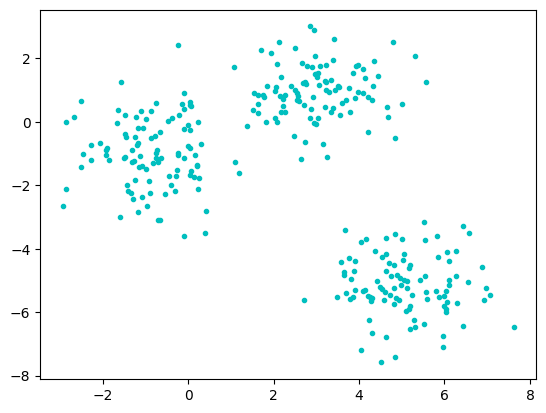

In [2]:
import matplotlib.pyplot as plt
plt.plot(x[:, 0], x[:, 1], 'c.')
plt.show()

In [3]:
N = 3 #liczba neuronow
M = 2 #liczba wag (liczba współrzędnych punktów)
#dwa neurony posiadają po 2 wagi
#zapis w[0,1] oznacza drugą wagę pierwszego neuronu
#(numeracja neuronu rozpoczyna się od 0)
wagi = np.random.random([N, M])*4-2 #wagi są losowane z zakresu (-2, 2)
print("Wartosci wag:")
print( wagi)


Wartosci wag:
[[-1.41603971  1.0852039 ]
 [ 1.13189496  0.71905803]
 [-0.94366253 -0.194917  ]]


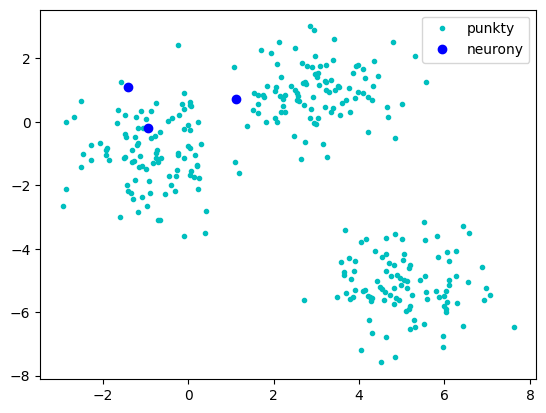

In [4]:
plt.plot(x[:, 0], x[:, 1], 'c.', label="punkty")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neurony")
plt.legend()

In [5]:
import math
def zwyciezca(xx):
 d = np.zeros(N)
 for i in range(N):
     for n in range(M):
         d[i] += (xx[n]-wagi[i, n])**2
     d[i] = math.sqrt( d[i] )
     #print( "Odleglosc neuronu nr",i,wagi[i],"od punktu",xx,"wynosi", d[i])
 z = np.argmin(d)
 #print("Zwycięzcą jest neuron nr",z)
 return z


In [6]:
sum = 0
e = 0
for k in range(500):
    sum = 0
    for i in range(len(x)):
        z = zwyciezca(x[i])
        for j in range(M):
            wagi[z,j] = wagi[z,j] + 0.01*(x[i][j]-wagi[z,j])
        sum += math.sqrt(math.pow(x[i][0] - wagi[z][0] ,2.0) + math.pow(x[i][1] - wagi[z][1] ,2.0))
    if(k ==0):
        e = 1/M *sum
        print(k,"{",e,"}")
    else:
        if(e == 1/M *sum):
            print("Zakonczono w iteracji:" , k)
            break
        else:
            e = 1/M *sum
            print(k,"{",e,"}")
    



0 { 356.0121995680933 }
1 { 336.6291154443766 }
2 { 234.2028350642778 }
3 { 186.29869242397186 }
4 { 176.71232642748177 }
5 { 175.66694256271722 }
6 { 175.6470066499277 }
7 { 175.71031560840572 }
8 { 175.74811243861996 }
9 { 175.76558942640565 }
10 { 175.77247139291933 }
11 { 175.77505520643427 }
12 { 175.77600963817835 }
13 { 175.77636015258574 }
14 { 175.77648860779496 }
15 { 175.7765356474023 }
16 { 175.77655286821297 }
17 { 175.7765591719608 }
18 { 175.77656147938657 }
19 { 175.7765623239855 }
20 { 175.77656263313696 }
21 { 175.77656274629652 }
22 { 175.77656278771667 }
23 { 175.7765628028778 }
24 { 175.77656280842717 }
25 { 175.77656281045847 }
26 { 175.77656281120215 }
27 { 175.77656281147415 }
28 { 175.7765628115738 }
29 { 175.7765628116103 }
30 { 175.7765628116235 }
31 { 175.77656281162848 }
32 { 175.77656281163019 }
33 { 175.77656281163092 }
34 { 175.77656281163098 }
35 { 175.77656281163107 }
36 { 175.77656281163118 }
37 { 175.77656281163124 }
38 { 175.7765628116312 }
Zakonczo

In [7]:
klasa = np.zeros(len(x))
for i in range(len(x)):
 z = zwyciezca(x[i])
 klasa[i]=z

    
    

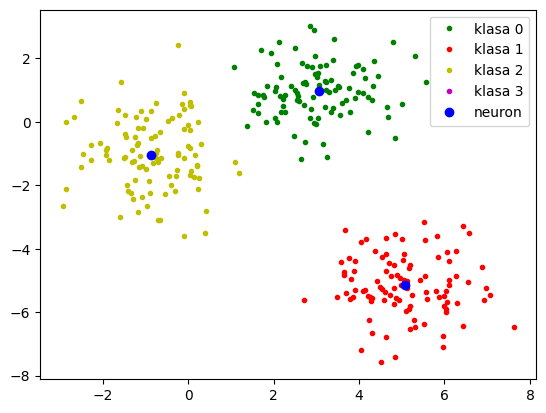

In [8]:
plt.plot(x[klasa[:]==0,0], x[klasa[:]==0,1], 'g.', label="klasa 0")
plt.plot(x[klasa[:]==1,0], x[klasa[:]==1,1], 'r.', label="klasa 1")
plt.plot(x[klasa[:]==2,0], x[klasa[:]==2,1], 'y.', label="klasa 2")
#plt.plot(x[klasa[:]==3,0], x[klasa[:]==3,1], 'm.', label="klasa 3")
plt.plot(wagi[:,0], wagi[:,1], 'bo', label="neuron")
plt.legend()
plt.show()